/home/heubuchm/devel/milliEye/.venv/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
[0:10:53.123428492] [1704]  INFO Camera camera_manager.cpp:284 libcamera v0.1.0+118-563cd78e
[0:10:53.172883124] [1722]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[0:10:53.177195922] [1722]  INFO RPI vc4.cpp:444 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media3 and ISP device /dev/media1
[0:10:53.177347124] [1722]  INFO RPI pipeline_base.cpp:1142 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[0:10:53.182306343] [1704]  INFO Camera camera_manager.cpp:284 libcamera v0.1.0+118-563cd78e
[0:1

{'SensorTimestamp': 654336331000, 'ColourCorrectionMatrix': (2.0014801025390625, -0.4972115755081177, -0.5042760968208313, -0.5304680466651917, 2.0080459117889404, -0.47757792472839355, -0.10334603488445282, -0.6948462128639221, 1.7981898784637451), 'FocusFoM': 385, 'ColourTemperature': 4432, 'ColourGains': (1.3646246194839478, 1.3866679668426514), 'AeLocked': False, 'Lux': 502.3731689453125, 'FrameDuration': 29968, 'SensorBlackLevels': (1024, 1024, 1024, 1024), 'DigitalGain': 1.0010907649993896, 'AnalogueGain': 2.0, 'ScalerCrop': (16, 0, 2560, 1920), 'ExposureTime': 29834}


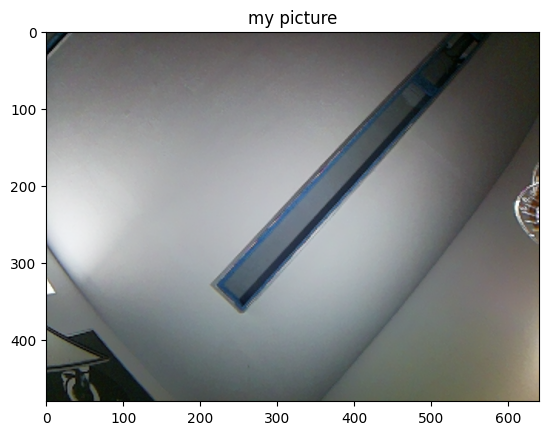

In [1]:
import time
import io
from matplotlib import pyplot as plt
import cv2
from IPython.display import display, Image

from picamera2 import Picamera2

picam2 = Picamera2()
picam2.configure(picam2.create_preview_configuration(main={"format": 'XRGB8888', "size": (640, 480)}))
capture_config = picam2.create_still_configuration()
#picam2.configure(picam2.create_preview_configuration())
picam2.start()

time.sleep(1)
metadata = picam2.capture_file("test.jpg")
print(metadata)
frame = picam2.capture_array()

picam2.stop()
picam2.close()

#img = cv2.imread('./data/milliEye.png')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(frame)
plt.title('my picture')
plt.show()

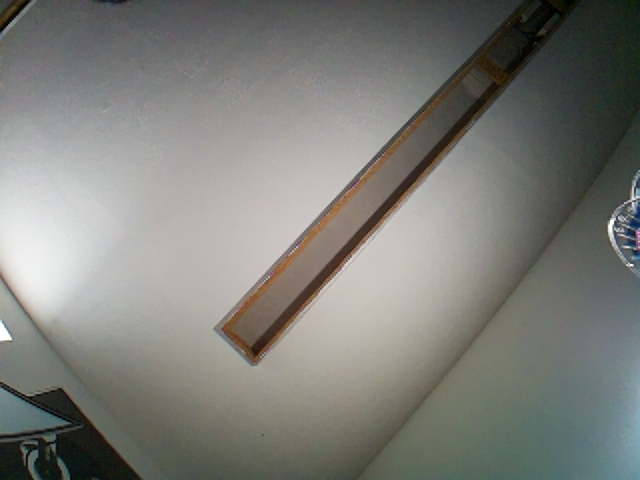

[0:13:00.627370257] [1766]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XRGB8888 (1) 640x480-SGBRG10_CSI2P
[0:13:00.627918327] [1726]  INFO RPI vc4.cpp:608 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10 - Selected unicam format: 640x480-pGAA


{'SensorTimestamp': 781761821000, 'ColourCorrectionMatrix': (1.9993081092834473, -0.49241840839385986, -0.5068966150283813, -0.5330141186714172, 2.0072715282440186, -0.47425734996795654, -0.10517992824316025, -0.7009784579277039, 1.8061553239822388), 'FocusFoM': 400, 'ColourTemperature': 4364, 'ColourGains': (1.3791909217834473, 1.4256901741027832), 'AeLocked': False, 'Lux': 498.3931579589844, 'FrameDuration': 30103, 'SensorBlackLevels': (1024, 1024, 1024, 1024), 'DigitalGain': 1.0208351612091064, 'AnalogueGain': 2.0, 'ScalerCrop': (16, 0, 2560, 1920), 'ExposureTime': 29968}


In [4]:
display_handle=display(None, display_id=True)

picam2 = Picamera2()
picam2.configure(picam2.create_preview_configuration(main={"format": 'XRGB8888', "size": (640, 480)}))
capture_config = picam2.create_still_configuration()
#picam2.configure(picam2.create_preview_configuration())
picam2.start()

time.sleep(1)
metadata = picam2.capture_file("test.jpg")
print(metadata)
frame = picam2.capture_array()
_, frame = cv2.imencode('.png', frame)
display_handle.update(Image(data=frame.tobytes()))

picam2.stop()
picam2.close()